In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [120]:
data = pd.read_csv('Social_Network_Ads.csv')

In [121]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [123]:
# Data preprocessing
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
X = data.iloc[:,2:4].values
y = data.iloc[:,-1:].values

# Split into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)

# Scale the variable
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
from sklearn.linear_model import LogisticRegressionCV

lg_clf = LogisticRegression(random_state=0)
lg_clf.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [130]:
y_pred = lg_clf.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

0.85


In [132]:
# Evaluate the performance of the logistic regression classifier
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)

In [133]:
cm

array([[25,  5],
       [ 1,  9]])

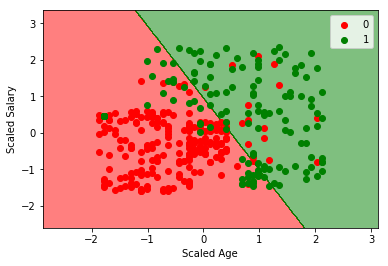

In [142]:
# Visualize the training results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1,0.01), np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01))
plt.contourf(X1, X2, lg_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('red', 'green')))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[np.where(y_set==j),0], X_set[np.where(y_set==j),1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.legend()
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Salary')

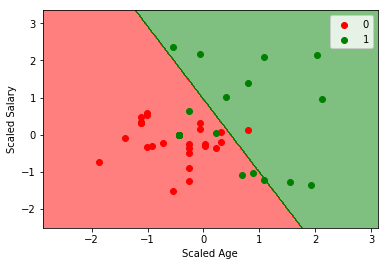

In [143]:
# Visualize the results on testing set
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1,0.01), np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01))
plt.contourf(X1, X2, lg_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('red', 'green')))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[np.where(y_set==j),0], X_set[np.where(y_set==j),1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.legend()
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Salary')

In [65]:
# Use cross validation to evaluate bias and variance
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=lg_clf, X=scaler.transform(X), y=y, cv=10, scoring='accuracy')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/l

In [66]:
accuracies

array([ 0.65853659,  0.70731707,  0.97560976,  0.95      ,  0.95      ,
        0.925     ,  0.825     ,  0.76923077,  0.82051282,  0.71794872])

In [144]:
accuracies.mean()

0.82991557223264534

In [145]:
accuracies.std()

0.10947206432508291